In [1]:
! pip install pandas
! pip install numpy
! pip install nltk
! pip install wordcloud
! pip install vader
! pip install matplotlib
! pip install cufflinks

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import nltk
import wordcloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chinw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chinw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chinw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chinw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
dataframe = pd.read_csv('women_clothing.csv', encoding='cp1252')

In [4]:
# Data Analysis

In [5]:
dataframe.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
dataframe.shape

(22628, 9)

In [7]:
dataframe.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [8]:
dataframe.dtypes

Clothing ID                 int64
Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [9]:
dataframe.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [10]:
dataframe = dataframe.drop_duplicates()
dataframe.shape

(22627, 9)

1. There are 22627 rows and 9 columns in the cleaned dataset.
2. There are 5 integer types and 5 text data tpe in the dataset
3. There are no duplicate values in the dataset
4. There are no null values in the dataset besides the Title column which is not needed


In [11]:
# Data Cleaning/ lematizing - getting root form of the word
import string, re
from nltk.stem import WordNetLemmatizer

In [12]:
dataframe = dataframe.rename(columns={'Class Name':'Class_Name'})
dataframe = dataframe.rename(columns={'Review Text':'Review'})
dataframe = dataframe.rename(columns={'Clothing ID':'Clothing_ID'})

In [13]:
# dataframe[['Class_Name', 'Age']].groupby('Age').count().plot(kind='barh', figsize=(10,10))
age_counts = dataframe[['Age', 'Class_Name']].groupby(['Age', 'Class_Name']).size().reset_index(name='Count')
print(age_counts)


      Age  Class_Name  Count
0      18     Dresses      2
1      18       Knits      1
2      18      Skirts      1
3      19     Blouses      4
4      19     Dresses     11
...   ...         ...    ...
1011   93  Fine gauge      1
1012   93        Swim      1
1013   94     Dresses      3
1014   99     Dresses      1
1015   99    Sweaters      1

[1016 rows x 3 columns]


The above table shows the age, class_name and count of age(i.e. the number of that age bracket that bought the clothes)

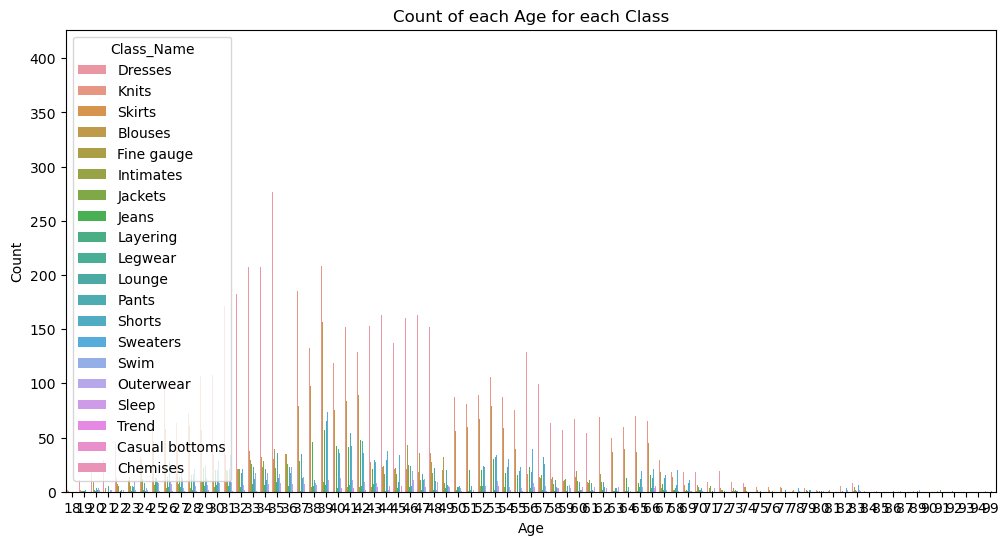

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'Age' and 'Class_Name'
# and you want to count the occurrences of each combination
grouped_df = dataframe.groupby(['Age', 'Class_Name']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Count', hue='Class_Name', data=grouped_df)
plt.title('Count of each Age for each Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



In [15]:
dataframe = dataframe[['Class_Name', 'Review']]
dataframe.head()

,Class_Name,Review
0,Intimates,Absolutely wonderful - silky and sexy and comf...
1,Dresses,Love this dress! it's sooo pretty. i happene...
2,Dresses,I had such high hopes for this dress and reall...
3,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,Blouses,This shirt is very flattering to all due to th...


In [16]:
# converting review to lowercase, removing special characters, removing numbers from the review.

In [17]:
def clean_and_generate_new_review(rawReview):
    new_review = rawReview.lower().strip()
    new_review = new_review.translate(str.maketrans('', '', string.punctuation))
    new_review = re.sub(r'\d+', '', new_review)
    return new_review

In [18]:
# viewing the changes made

In [19]:
dataframe['NewReview'] = dataframe.Review.apply(clean_and_generate_new_review)

In [20]:
dataframe.head()

,Class_Name,Review,NewReview
0,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...
1,Dresses,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened t...
2,Dresses,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,Pants,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...
4,Blouses,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...


In [21]:
#removing stopwords

In [22]:
#import nltk
#nltk.download('stopwords')

In [23]:
#Tokenisation Remove Stop Words
stop_word_list = set(nltk.corpus.stopwords.words('english'))

def tokenise_and_stop_words_removal(NewReview):
    stop_words_removed_review = list()
    tokenised_review = nltk.tokenize.word_tokenize(NewReview)
    for word in tokenised_review:
        if word not in stop_word_list:
            stop_words_removed_review.append(word)
    newReview = " ".join(stop_words_removed_review)
    return newReview

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chinw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
dataframe['StopRemovedReview'] = dataframe.NewReview.apply(tokenise_and_stop_words_removal)
dataframe.head()

,Class_Name,Review,NewReview,StopRemovedReview
0,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable
1,Dresses,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...
2,Dresses,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...
3,Pants,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...
4,Blouses,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...


In [26]:
# Lemmatization
word_lemmatizer = WordNetLemmatizer()

def lemmatize_review(StopRemovedReview):
    lemma_review = list()
    StopRemovedReview = StopRemovedReview.split()
    for word in StopRemovedReview:
        lemma_word = word_lemmatizer.lemmatize(word)
        lemma_review.append(lemma_word)
    return " ".join(lemma_review)

In [27]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chinw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chinw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [28]:
dataframe['CleanReview'] = dataframe.StopRemovedReview.apply(lemmatize_review)
dataframe.head()

,Class_Name,Review,NewReview,StopRemovedReview,CleanReview
0,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable
1,Dresses,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...
2,Dresses,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,high hope dress really wanted work initially o...
3,Pants,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...
4,Blouses,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...


1. We have removed unncessary columns such as Cloth_ID, Age, Recommeneded IND, Division Name and Department Name.
2. We converted the raw review to lower case.
3. White spaces/blank spaces are stripped of from both ends.
4. Punctuations and special characters are removed from the reviews.
5. Numbers are removed from the reviews.
6. The reviews are tokenized.
7. Stop words are removed from the reviews.
8. Lemmatization is performed to bring words to their root form in the reviews.

# Visualisations

In [29]:
#Joining words together
fullTextFromReviewList = list((dataframe['CleanReview'].values))
fullTextFromReview = ",".join(fullTextFromReviewList)

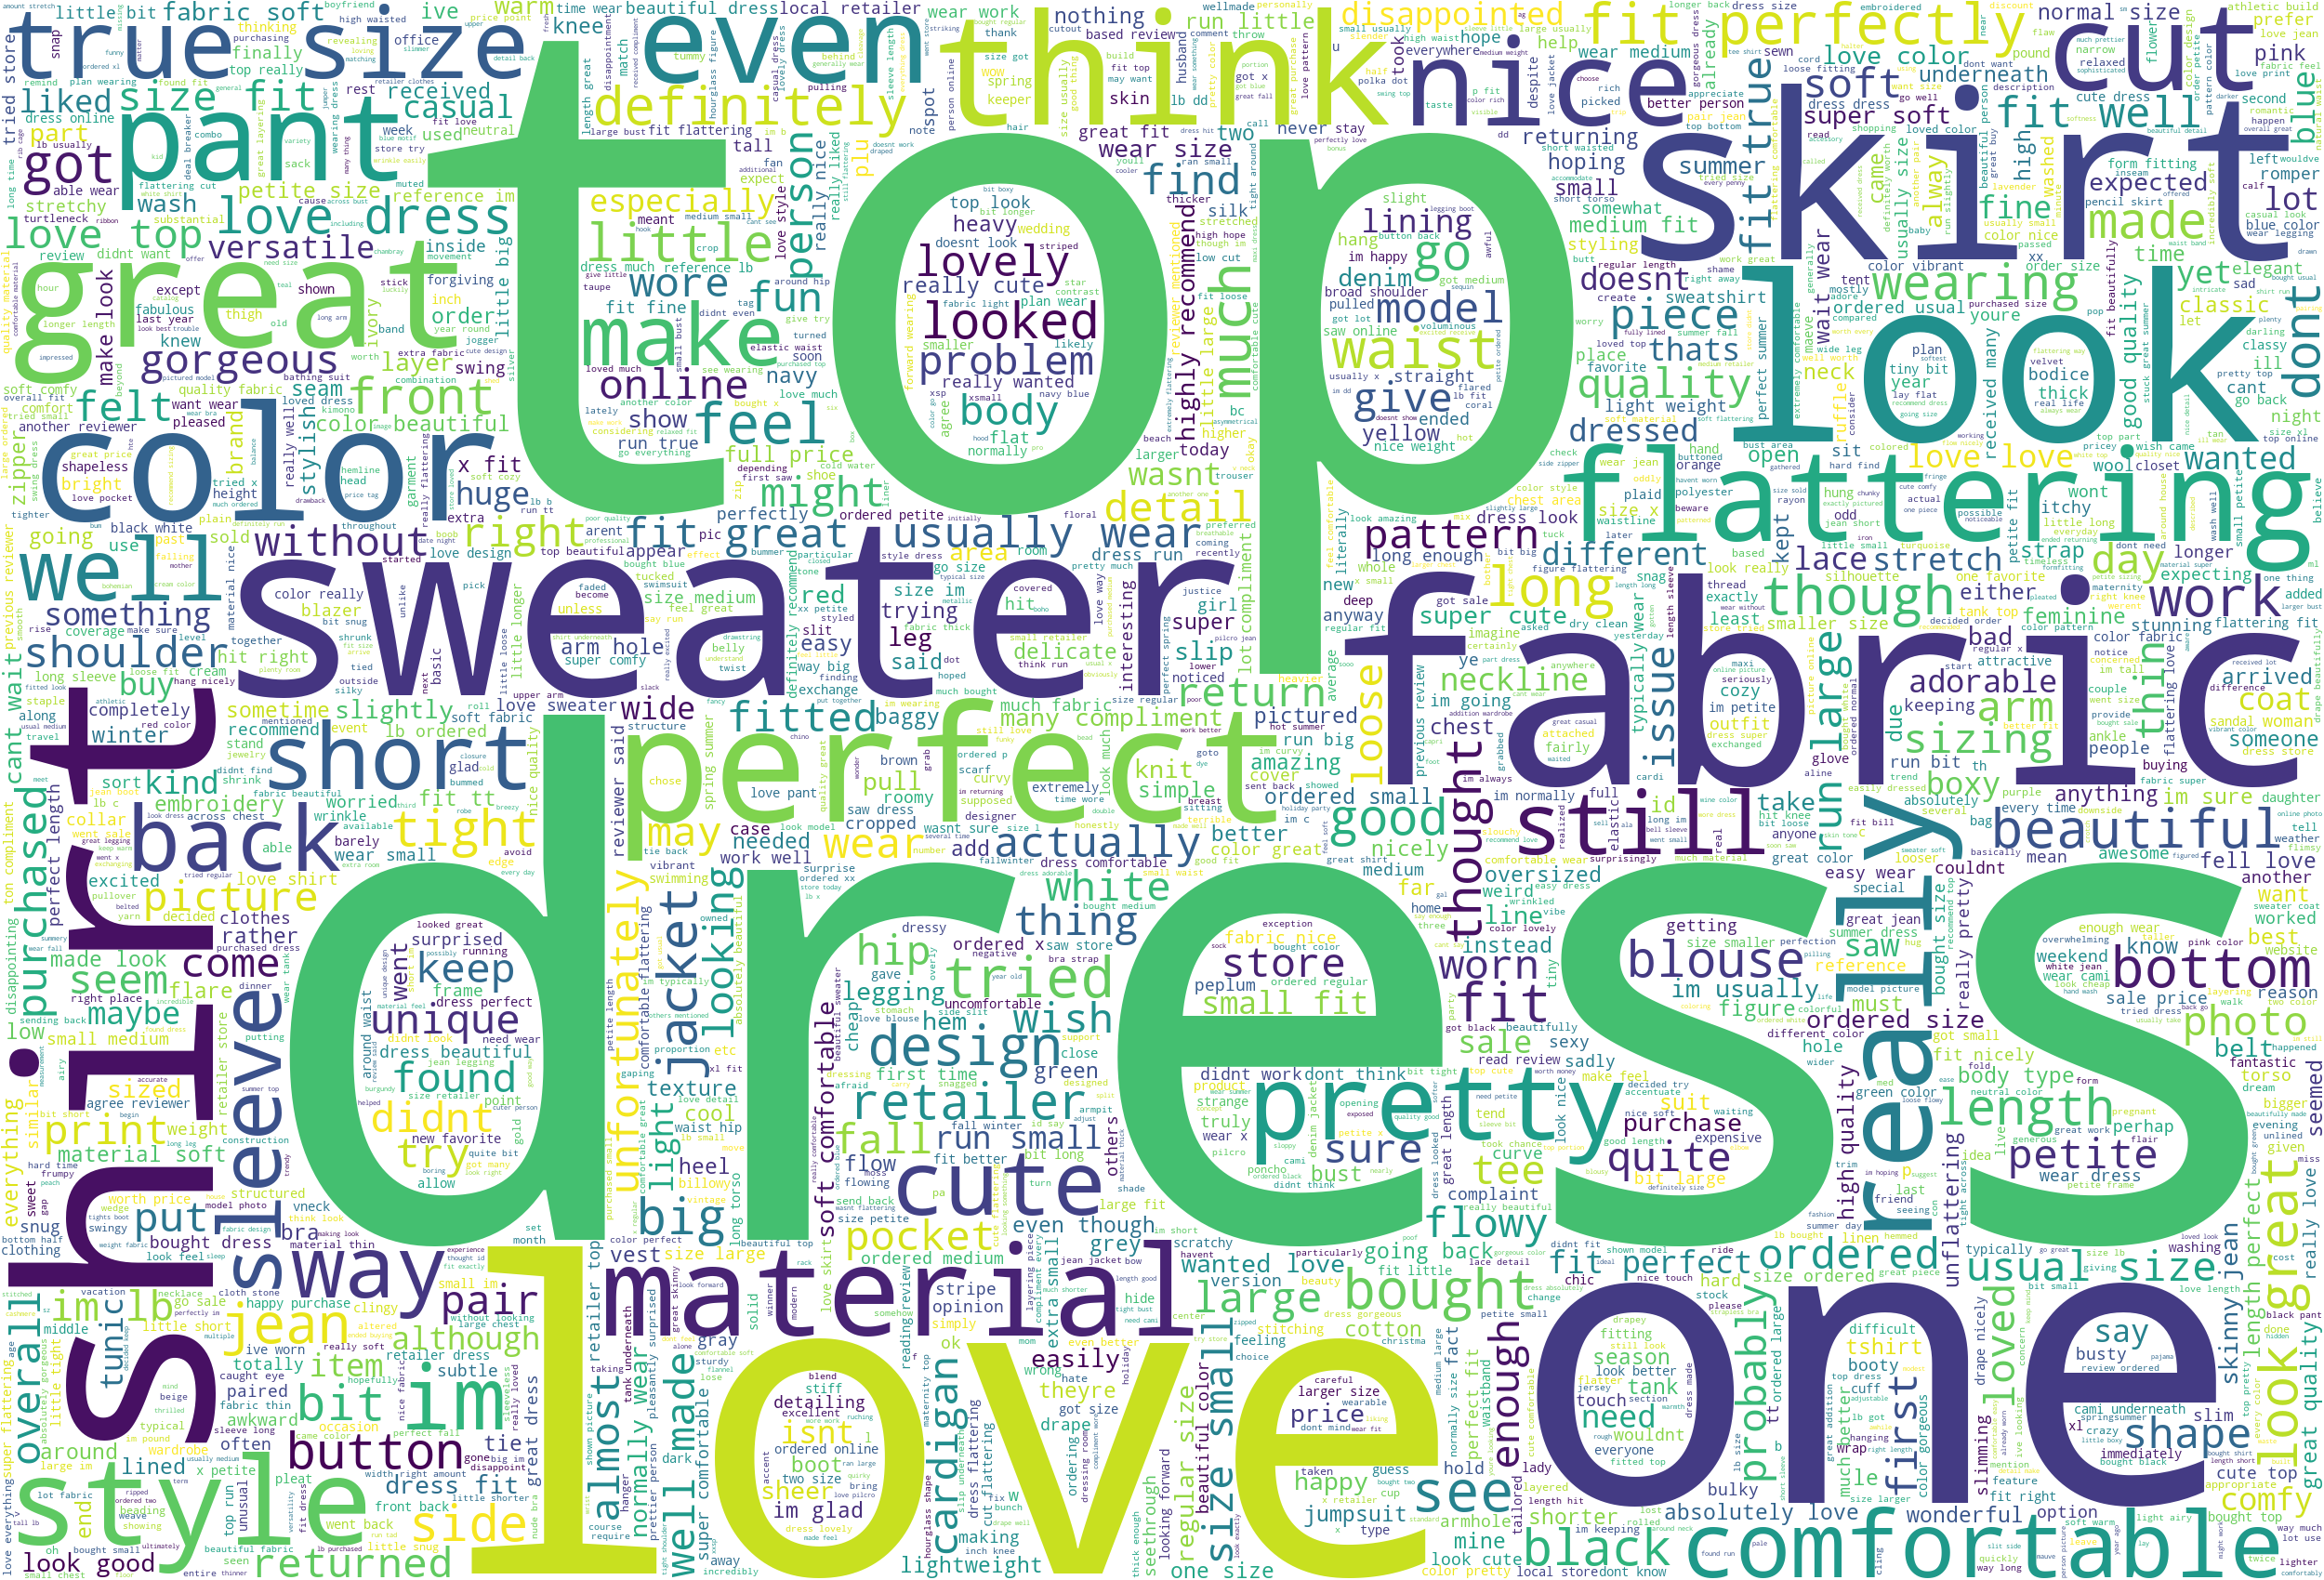

In [30]:
wordCloudObject = wordcloud.WordCloud(max_words=2000, width= 2500, height = 1700)
wordCloudObject.generate(fullTextFromReview).background_color="white"
wordCloudObject.to_image()

The above wordcloud is built after cleaning the text reviews. Customers have used words such as top, dress, love, one, sweater, fabric, skirt, perfect etc dominantly in the reviews.

In [31]:
# Plotting UniGrams After Text Cleaning

text_list = dataframe['CleanReview'].tolist()
split_text_list = list()
for word in text_list:
    split_text_list.append(word.split(' '))

unigram_words = list()

for sub in split_text_list:
    for s in sub:
        unigram_words.append(s)

In [32]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [33]:
#plotting the 15 unique words used by customer in the review.

In [34]:
# PLotting Unigrams (one word)
uniDf = pd.Series(nltk.ngrams(unigram_words, 1)).value_counts().to_frame().reset_index()
uniDf.columns = ['word','count']
uniDf['word'] = uniDf.word.apply(lambda x: x[0])
uniDf.head(15).iplot(kind='bar', x='word', y='count', yTitle='Count', title='Top 15 Frequent words in Reviews')

In [35]:
# PLotting Bigrams
biDf = pd.Series(nltk.ngrams(unigram_words, 2)).value_counts().to_frame().reset_index()
biDf.columns = ['word','count']
biDf['word'] = biDf.word.apply(lambda x: ",".join(x))
biDf.head(15).iplot(kind='bar', x='word', y='count', yTitle='Count', title='Top 15 Frequnt Bigrams in Reviews')

1. Unigrams plot shows the most frequent single words used by the reviewers for the hotels. These words are dress, fit, size, love etc
2. Bi-Grams plot shows us the combination of two words used by the customers. Since, we are analysing clothes, people have used (true, size) majority of the time in their reviews. People also reviewed about the look great and fit perfectly regarding the class_name.

# Sentiments Analysis with Vader

In [36]:
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     ------------ ------------------------ 41.0/126.0 kB 326.8 kB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 925.7 kB/s eta 0:00:00


In [37]:
import vaderSentiment.vaderSentiment

In [38]:
# vader gives the sentiment of the review

In [39]:
vader_analzer = vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer()

def calculate_score_with_label(CleanReview):
    sentiments = vader_analzer.polarity_scores(CleanReview)
#     print(sentiments)
    sentiments_score = sentiments['compound']
    if sentiments_score >= 0.5:
        return 'positive'
    elif sentiments_score <= -0.5 :
        return 'negative'
    else:
        return 'neutral'

In [40]:
dataframe['sentimentLabel'] = dataframe.CleanReview.apply(calculate_score_with_label)
dataframe.head()

,Class_Name,Review,NewReview,StopRemovedReview,CleanReview,sentimentLabel
0,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,positive
1,Dresses,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,positive
2,Dresses,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,high hope dress really wanted work initially o...,positive
3,Pants,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,positive
4,Blouses,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,positive


In [41]:
results_df = dataframe['sentimentLabel'].value_counts().to_frame().reset_index()
results_df.columns = ['sentimentLabel', 'count']
print(results_df)
results_df.head(15).iplot(kind='bar', x='sentimentLabel', y='count', yTitle='Count',color=['red','yellow','green'], title='Sentiments Analysis')

  sentimentLabel  count
0       positive  20060
1        neutral   2359
2       negative    208


In [42]:
# Plotting Positive Review

<Axes: title={'center': 'Positive Reviews'}, xlabel='Class_Name'>

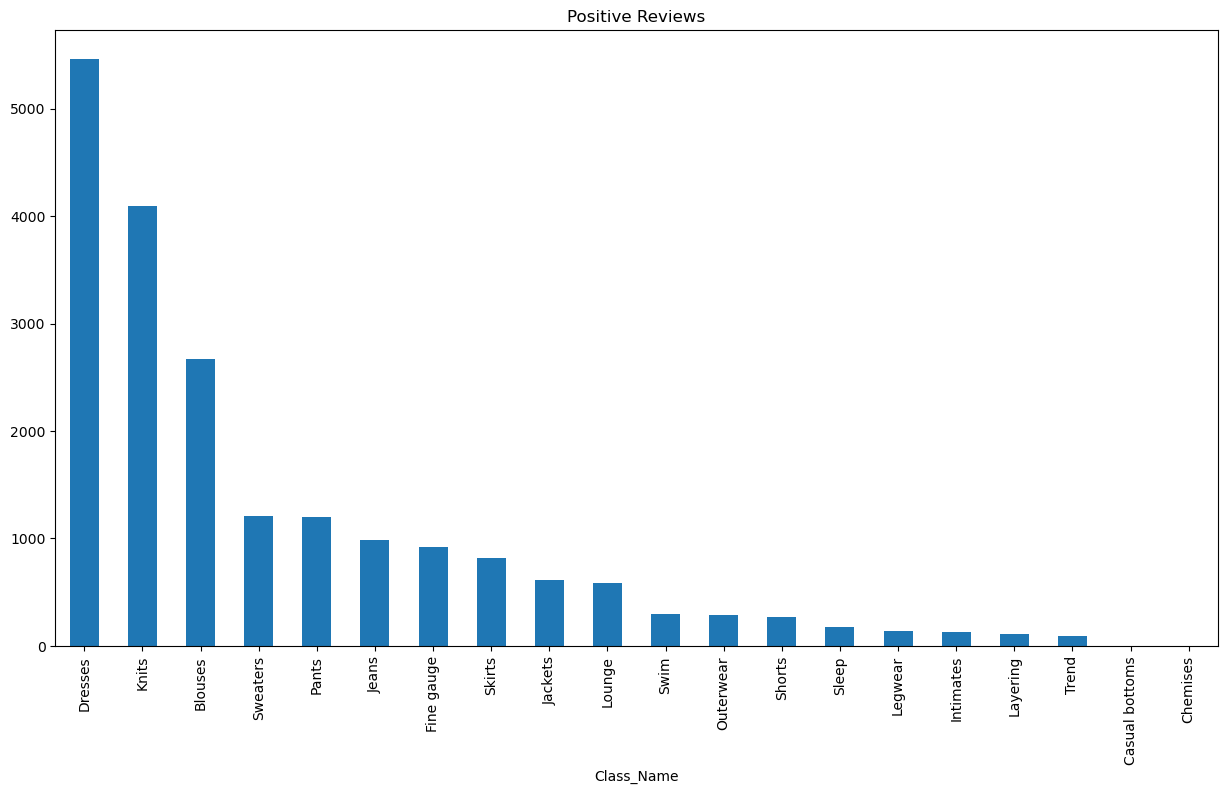

In [43]:
dataframe.loc[dataframe.sentimentLabel=='positive'][['Class_Name', 'sentimentLabel']] \
                                .groupby('Class_Name')  \
                                .count().sort_values(by='sentimentLabel', ascending=False).plot(kind='bar', figsize=(15,8), legend=False, title='Positive Reviews')

In [44]:
# Plotting Negative Review

<Axes: title={'center': 'Negative Reviwes'}, xlabel='Class_Name'>

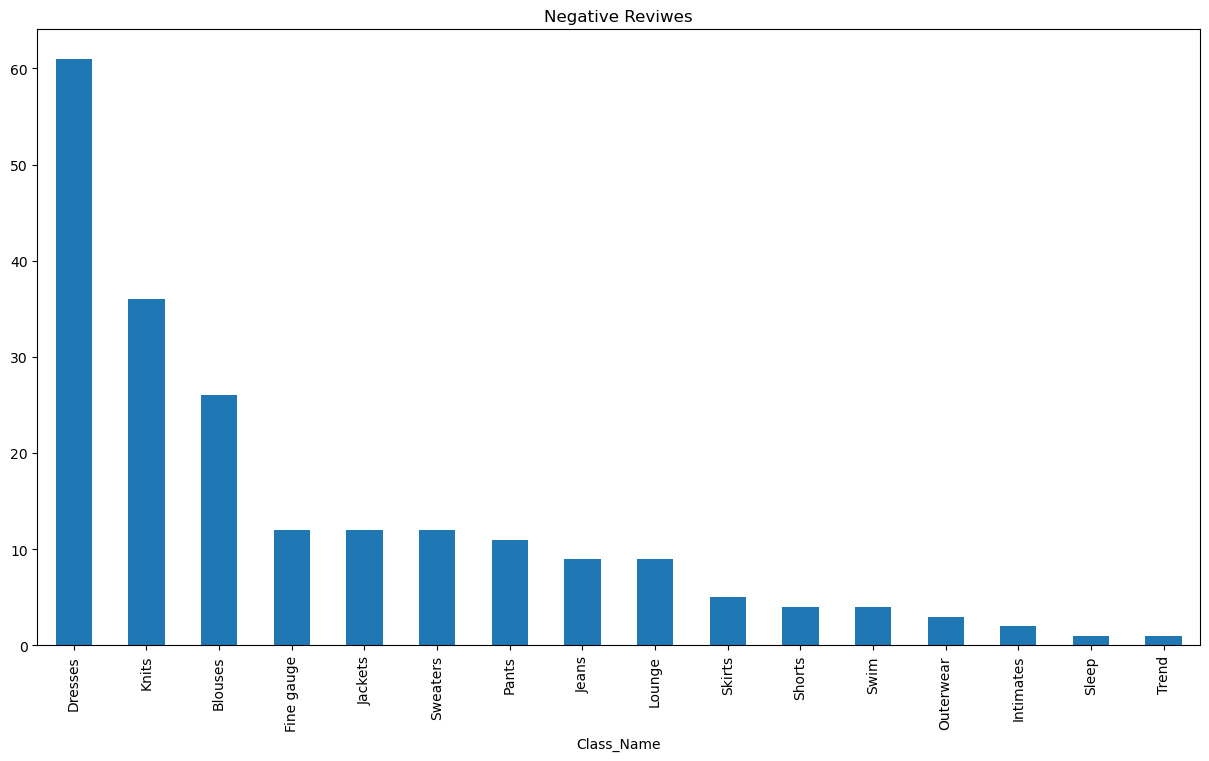

In [45]:
dataframe.loc[dataframe.sentimentLabel=='negative'][['Class_Name', 'sentimentLabel']] \
                                    .groupby('Class_Name').count() \
                                    .sort_values(by='sentimentLabel', ascending=False) \
                                    .plot(kind='bar', figsize=(15,8), legend=False, title='Negative Reviwes')

# Conclusion

As we didn't have labels associated with our reviews, we can't train a classification model to predict the sentiment of a review. However, there are many libraries such as Vader, TextBlob, nltk and Flair that can give us the sentiement of a review with rule-based algorithms such as lexicon models. We have used Vader to find the sentiment of our reviews.

It could be seen that more than 20060 reviews were positive followed by 2359 neutral reviews. The number of negative reviews is minimum for these hotels (208 reviews). This could act as a good indicator for the new customers to visit this clothing store as majority of them have positive feedback given by the customers.

We have created plots for the Class Name with maximum positive and negative reviews recieved making it easier for the customers to finalise their choice of clothes.
This should be noted that the bars for negative plot are long. However, the scale on the y-axis is very low (maximum 61) as compared to the y-axis scale of positive reviews plot of nearly 6000.

Class name named 'Dresses' and "Knits" received most of the negative reviews. Also, it has received the most number of positive reviews as compared to the other class names.